In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [2]:
torch.manual_seed(1)  # 使用随机化种子使神经网络的初始化每次都相同
class DigitDataset(Dataset):
    def __init__(self,root):
        self.root = root
        self.files = os.listdir(root)
        self.transform = transforms.ToTensor()   # 会把(H,W)转成(1,H,W)
    def __len__(self):
        return len(self.files)
    def __getitem__(self,idx):
        fname = self.files[idx]
        label = int(fname[0])
        path = os.path.join(self.root,fname)

        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE) 
        img = self.transform(img)  # 转成tensor，自动 /255
        return img,label

In [3]:
train_data = DigitDataset('./TrainingSet/')
test_data = DigitDataset('./TestSet/')

train_loader = Data.DataLoader(train_data, batch_size=50, shuffle=True)
test_loader = Data.DataLoader(test_data, batch_size=200, shuffle=False)

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        return self.out(x)

cnn = CNN()
print(cnn)


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [5]:
EPOCH = 5
LR = 0.001
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

# for epoch in range(EPOCH):
#     for step, (b_x, b_y) in enumerate(train_loader):
#         output = cnn(b_x)
#         loss = loss_func(output, b_y)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    
#         if step % 100 == 0:
#             # 测试集计算 accuracy
#             correct = 0
#             total = 0
#             for test_x, test_y in Data.DataLoader(test_data, batch_size=200, shuffle=False):
#                 test_output = cnn(test_x)
#                 pred = torch.max(test_output, 1)[1]
#                 correct += (pred == test_y).sum().item()
#                 total += test_y.size(0)

#             acc = correct / total
#             print(f'Epoch {epoch} | Step {step} | Loss {loss.item():.4f} | Test Acc {acc:.4f}')

loss_list = []
acc_list = []
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):
        output = cnn(b_x)
        loss = loss_func(output, b_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())

    # 每个 epoch 做一次测试
    correct = 0
    total = 0
    for t_x, t_y in test_loader:
        test_output = cnn(t_x)
        pred = torch.max(test_output, 1)[1]
        correct += (pred == t_y).sum().item()
        total += t_y.size(0)
    acc = correct / total
    acc_list.append(acc)
    print(f"[Epoch {epoch}] Loss={loss.item():.4f}, Test Acc={acc:.4f}")

[Epoch 0] Loss=0.0616, Test Acc=0.9809
[Epoch 1] Loss=0.0070, Test Acc=0.9862
[Epoch 2] Loss=0.0055, Test Acc=0.9887
[Epoch 3] Loss=0.0202, Test Acc=0.9889
[Epoch 4] Loss=0.0758, Test Acc=0.9914


In [5]:
EPOCH = 5
LR = 0.001
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):
        output = cnn(b_x)
        loss = loss_func(output, b_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        if step % 100 == 0:
            # 测试集计算 accuracy
            correct = 0
            total = 0
            for test_x, test_y in Data.DataLoader(test_data, batch_size=200, shuffle=False):
                test_output = cnn(test_x)
                pred = torch.max(test_output, 1)[1]
                correct += (pred == test_y).sum().item()
                total += test_y.size(0)

            acc = correct / total
            print(f'Epoch {epoch} | Step {step} | Loss {loss.item():.4f} | Test Acc {acc:.4f}')

Epoch 0 | Step 0 | Loss 2.2917 | Test Acc 0.1894
Epoch 0 | Step 100 | Loss 0.2134 | Test Acc 0.9081
Epoch 0 | Step 200 | Loss 0.1484 | Test Acc 0.9413
Epoch 0 | Step 300 | Loss 0.0650 | Test Acc 0.9626
Epoch 0 | Step 400 | Loss 0.1872 | Test Acc 0.9635
Epoch 0 | Step 500 | Loss 0.1070 | Test Acc 0.9740
Epoch 0 | Step 600 | Loss 0.1965 | Test Acc 0.9752
Epoch 0 | Step 700 | Loss 0.1348 | Test Acc 0.9765
Epoch 0 | Step 800 | Loss 0.1625 | Test Acc 0.9759
Epoch 0 | Step 900 | Loss 0.1532 | Test Acc 0.9814
Epoch 0 | Step 1000 | Loss 0.0206 | Test Acc 0.9807
Epoch 0 | Step 1100 | Loss 0.0693 | Test Acc 0.9821
Epoch 1 | Step 0 | Loss 0.2149 | Test Acc 0.9823
Epoch 1 | Step 100 | Loss 0.0489 | Test Acc 0.9831
Epoch 1 | Step 200 | Loss 0.0812 | Test Acc 0.9817
Epoch 1 | Step 300 | Loss 0.0422 | Test Acc 0.9771
Epoch 1 | Step 400 | Loss 0.1236 | Test Acc 0.9845
Epoch 1 | Step 500 | Loss 0.0894 | Test Acc 0.9872
Epoch 1 | Step 600 | Loss 0.0600 | Test Acc 0.9827
Epoch 1 | Step 700 | Loss 0.0046 

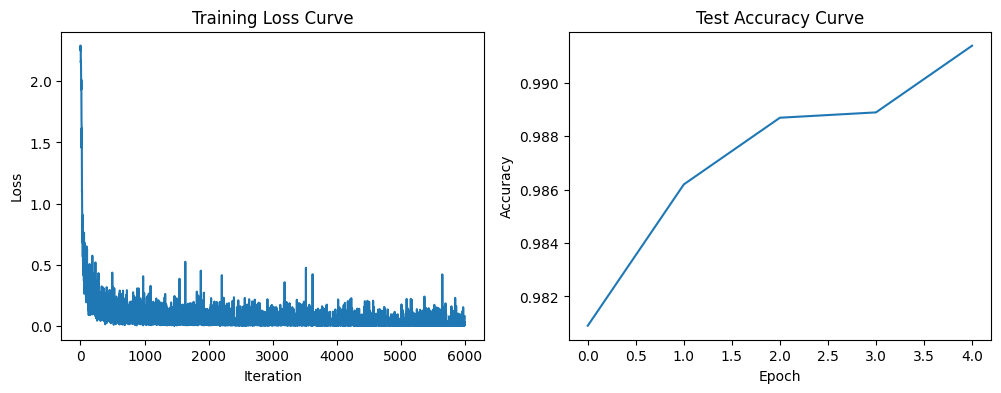

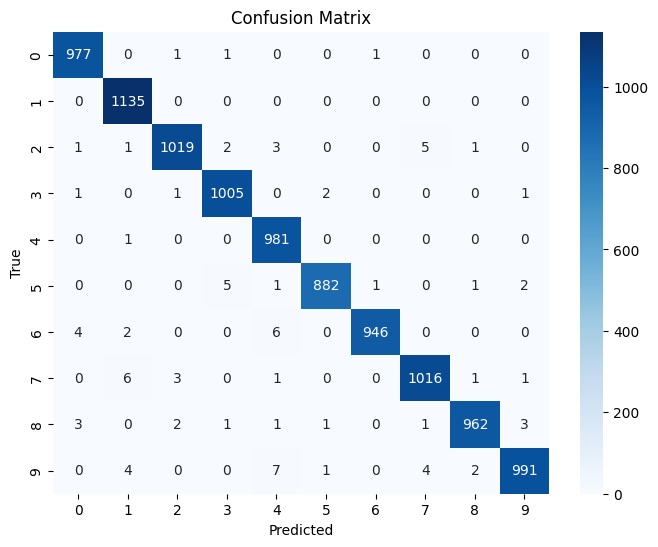

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_list)
plt.title("Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(acc_list)
plt.title("Test Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

all_preds = []
all_labels = []
for t_x, t_y in test_loader:
    out = cnn(t_x)
    pred = torch.max(out, 1)[1]
    all_preds.extend(pred.numpy())
    all_labels.extend(t_y.numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report:")
print(classification_report(all_labels, all_preds))

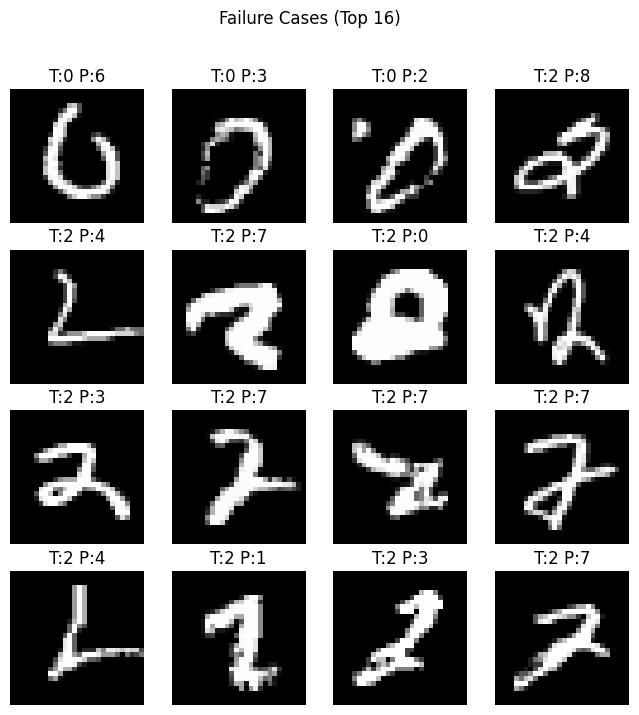

In [11]:
wrong_imgs = []
wrong_pred = []
wrong_true = []

for img, label in test_data:
    output = cnn(img.unsqueeze(0))
    pred = torch.max(output,1)[1].item()
    if pred != label:
        wrong_imgs.append(img.squeeze().numpy())
        wrong_pred.append(pred)
        wrong_true.append(label)
    if len(wrong_imgs) >= 16:
        break

plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(wrong_imgs[i], cmap='gray')
    plt.title(f"T:{wrong_true[i]} P:{wrong_pred[i]}")
    plt.axis('off')

plt.suptitle("Failure Cases (Top 16)")
plt.show()

In [12]:
torch.save(cnn.state_dict(), 'digit_cnn.pkl')

In [13]:
cnn.load_state_dict(torch.load('digit_cnn.pkl'))
cnn.eval()

samples = []
labels = []
cnt = 0

for img, label in test_data:
    samples.append(img)
    labels.append(label)
    cnt += 1
    if cnt >= 32:
        break

inputs = torch.stack(samples)
test_output = cnn(inputs)
pred_y = torch.max(test_output, 1)[1]

print("Pred:", pred_y.numpy())
print("True:", np.array(labels))


Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
import torchvision

grid = torchvision.utils.make_grid(inputs, nrow=8)
img = grid.numpy().transpose(1, 2, 0)
cv2.imshow("Samples", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


**TRY**

In [ ]:
# torch.manual_seed(1)  # 使用随机化种子使神经网络的初始化每次都相同

# # 超参数
# EPOCH = 1  # 训练整批数据的次数
# BATCH_SIZE = 50
# LR = 0.001  # 学习率
# DOWNLOAD_MNIST = False  # 表示还没有下载数据集，如果数据集下载好了就写False

# # 下载mnist手写数据集
# train_data = torchvision.datasets.MNIST(
#     root='./TrainingSet/',  # 保存或提取的位置  会放在当前文件夹中
#     train=True,  # true说明是用于训练的数据，false说明是用于测试的数据
#     transform=torchvision.transforms.ToTensor(),  # 转换PIL.Image or numpy.ndarray

#     download=DOWNLOAD_MNIST,  # 已经下载了就不需要下载了
# )

# test_data = torchvision.datasets.MNIST(
#     root='./TestSet/',
#     train=False  # 表明是测试集
# )

# # 批训练 50个samples， 1  channel，28x28 (50,1,28,28)
# # Torch中的DataLoader是用来包装数据的工具，它能帮我们有效迭代数据，这样就可以进行批训练
# train_loader = Data.DataLoader(
#     dataset=train_data,
#     batch_size=BATCH_SIZE,
#     shuffle=True  # 是否打乱数据，一般都打乱
# )

# # 进行测试
# # 为节约时间，测试时只测试前2000个
# #
# test_x = torch.unsqueeze(test_data.train_data, dim=1).type(torch.FloatTensor)[:2000] / 255
# # torch.unsqueeze(a) 是用来对数据维度进行扩充，这样shape就从(2000,28,28)->(2000,1,28,28)
# # 图像的pixel本来是0到255之间，除以255对图像进行归一化使取值范围在(0,1)
# test_y = test_data.test_labels[:2000]


# # 用class类来建立CNN模型
# # CNN流程：卷积(Conv2d)-> 激励函数(ReLU)->池化(MaxPooling)->
# #        卷积(Conv2d)-> 激励函数(ReLU)->池化(MaxPooling)->
# #        展平多维的卷积成的特征图->接入全连接层(Linear)->输出

# class CNN(nn.Module):  # 我们建立的CNN继承nn.Module这个模块
#     def __init__(self):
#         super(CNN, self).__init__()
#         # 建立第一个卷积(Conv2d)-> 激励函数(ReLU)->池化(MaxPooling)
#         self.conv1 = nn.Sequential(
#             # 第一个卷积con2d
#             nn.Conv2d(  # 输入图像大小(1,28,28)
#                 in_channels=1,  # 输入图片的高度，因为minist数据集是灰度图像只有一个通道
#                 out_channels=16,  # n_filters 卷积核的高度
#                 kernel_size=5,  # filter size 卷积核的大小 也就是长x宽=5x5
#                 stride=1,  # 步长
#                 padding=2,  # 想要con2d输出的图片长宽不变，就进行补零操作 padding = (kernel_size-1)/2
#             ),  # 输出图像大小(16,28,28)
#             # 激活函数
#             nn.ReLU(),
#             # 池化，下采样
#             nn.MaxPool2d(kernel_size=2),  # 在2x2空间下采样
#             # 输出图像大小(16,14,14)
#         )
#         # 建立第二个卷积(Conv2d)-> 激励函数(ReLU)->池化(MaxPooling)
#         self.conv2 = nn.Sequential(
#             # 输入图像大小(16,14,14)
#             nn.Conv2d(  # 也可以直接简化写成nn.Conv2d(16,32,5,1,2)
#                 in_channels=16,
#                 out_channels=32,
#                 kernel_size=5,
#                 stride=1,
#                 padding=2
#             ),
#             # 输出图像大小 (32,14,14)
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             # 输出图像大小(32,7,7)
#         )
#         # 建立全卷积连接层
#         self.out = nn.Linear(32 * 7 * 7, 10)  # 输出是10个类

#     # 下面定义x的传播路线
#     def forward(self, x):
#         x = self.conv1(x)  # x先通过conv1
#         x = self.conv2(x)  # 再通过conv2
#         # 把每一个批次的每一个输入都拉成一个维度，即(batch_size,32*7*7)
#         # 因为pytorch里特征的形式是[bs,channel,h,w]，所以x.size(0)就是batchsize
#         x = x.view(x.size(0), -1)  # view就是把x弄成batchsize行个tensor
#         output = self.out(x)
#         return output


# cnn = CNN()
# print(cnn)

# # 训练
# # 把x和y 都放入Variable中，然后放入cnn中计算output，最后再计算误差

# # 优化器选择Adam
# optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
# # 损失函数
# loss_func = nn.CrossEntropyLoss()  # 目标标签是one-hotted


In [ ]:
# # 开始训练
# for epoch in range(EPOCH):
#     for step, (b_x, b_y) in enumerate(train_loader):  # 分配batch data
#         output = cnn(b_x)  # 先将数据放到cnn中计算output
#         loss = loss_func(output, b_y)  # 输出和真实标签的loss，二者位置不可颠倒
#         optimizer.zero_grad()  # 清除之前学到的梯度的参数
#         loss.backward()  # 反向传播，计算梯度
#         optimizer.step()  # 应用梯度

#         if step % 50 == 0:
#             test_output = cnn(test_x)
#             pred_y = torch.max(test_output, 1)[1].data.numpy()
#             accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
#             print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

# torch.save(cnn.state_dict(), 'cnn2.pkl')#保存模型

In [ ]:
# # 加载模型，调用时需将前面训练及保存模型的代码注释掉，否则会再训练一遍
# cnn.load_state_dict(torch.load('cnn2.pkl'))
# cnn.eval()
# # print 10 predictions from test data
# inputs = test_x[:32]  # 测试32个数据
# test_output = cnn(inputs)
# pred_y = torch.max(test_output, 1)[1].data.numpy()
# print(pred_y, 'prediction number')  # 打印识别后的数字
# # print(test_y[:10].numpy(), 'real number')

# img = torchvision.utils.make_grid(inputs)
# img = img.numpy().transpose(1, 2, 0)

# # 下面三行为改变图片的亮度
# # std = [0.5, 0.5, 0.5]
# # mean = [0.5, 0.5, 0.5]
# # img = img * std + mean
# cv2.imshow('win', img)  # opencv显示需要识别的数据图片
# key_pressed = cv2.waitKey(0)